# Task1: Descriptive Analysis, Unsupervised Learning – IKEA


General steps to follow:
    data exploration, 
    data transformation, 
    data reduction and then implement k-means clustering method

In [1]:
# Loading the required libraries/packages

# For data loading and manipulation
import os
import numpy as pd
import pandas as pd
from pandas import Series ,DataFrame 
import numpy as np

# For Visualization/EDA
import matplotlib.pyplot as plt
import seaborn as sns
import csv


import re
#import jovian
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from wordcloud import WordCloud, STOPWORDS
import emoji
from collections import Counter


# The Data:

In [4]:
## Set operating system path

os.chdir('C:/Users/admin/Desktop/BI/BI lab')


# DataExploration

In [4]:
## inspect the first 5 records.

Data.head()

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0


In [5]:
## inspect the below 5 records.

Data.tail()

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
202,1863,2010,Hällefors,52,33,7220,368,0.050970,78.97019,5.358015,0,0
203,1864,2010,Ljusnarsberg,51,24,4931,266,0.053944,106.49585,5.254976,0,0
204,1880,2010,Örebro,6228,2995,135460,19516,0.144072,104.21387,641.725346,0,0
205,1881,2010,Kumla,152,98,20456,1598,0.078119,77.73047,15.661890,0,0
206,1882,2010,Askersund,126,65,11278,809,0.071733,97.14735,12.982883,0,0


In [6]:
## The csv dataframe info 

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Kommun_code            207 non-null    int64  
 1   Year                   207 non-null    int64  
 2   Kommun_name            207 non-null    object 
 3   Revenue                207 non-null    int64  
 4   Employee               207 non-null    int64  
 5   Population             207 non-null    int64  
 6   Population_University  207 non-null    int64  
 7   Percent_University     207 non-null    float64
 8   Productivity           207 non-null    float64
 9   SalesIndex             207 non-null    float64
 10  Infrast                207 non-null    int64  
 11  Border                 207 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 18.7+ KB


In [7]:
## The shape of dataframe

Data.shape

(207, 12)

In [8]:
## The overall description of dataframe

Data.describe()

,Kommun_code,Year,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
count,207.000000,207.0,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,1049.734300,2010.0,1031.801932,523.038647,34543.396135,4660.106280,0.097461,91.454002,106.315583,0.048309,0.038647
std,541.065455,0.0,2694.889549,1463.194427,66882.499740,14403.495784,0.040760,27.960867,277.678055,0.214939,0.193220
min,114.000000,2010.0,11.000000,2.000000,3672.000000,174.000000,0.046142,19.898880,1.133426,0.000000,0.000000
25%,582.500000,2010.0,110.000000,64.500000,10785.500000,788.500000,0.069015,74.700910,11.334262,0.000000,0.000000
50%,1263.000000,2010.0,252.000000,142.000000,16515.000000,1598.000000,0.086601,90.457050,25.965765,0.000000,0.000000
75%,1461.500000,2010.0,825.500000,435.000000,37922.000000,4073.500000,0.112085,104.008805,85.058490,0.000000,0.000000
max,2583.000000,2010.0,32897.000000,18795.000000,847073.000000,191585.000000,0.269646,275.636330,3389.665819,1.000000,1.000000


In [9]:
## Displays columns attributes
Data.columns

Index(['Kommun_code', 'Year', 'Kommun_name', 'Revenue', 'Employee',
       'Population', 'Population_University', 'Percent_University',
       'Productivity', 'SalesIndex', 'Infrast', 'Border'],
      dtype='object')

# Data Reduction

In [10]:
# Identify missing values of dataframe

Data.isnull()

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
202,False,False,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,False,False
204,False,False,False,False,False,False,False,False,False,False,False,False
205,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
## Droping unwanted columns 

Data.drop(['Kommun_code', 'Year'], axis=1, inplace=True)


In [12]:
## The overall description of dataframe

Data.describe()

,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,1031.801932,523.038647,34543.396135,4660.106280,0.097461,91.454002,106.315583,0.048309,0.038647
std,2694.889549,1463.194427,66882.499740,14403.495784,0.040760,27.960867,277.678055,0.214939,0.193220
min,11.000000,2.000000,3672.000000,174.000000,0.046142,19.898880,1.133426,0.000000,0.000000
25%,110.000000,64.500000,10785.500000,788.500000,0.069015,74.700910,11.334262,0.000000,0.000000
50%,252.000000,142.000000,16515.000000,1598.000000,0.086601,90.457050,25.965765,0.000000,0.000000
75%,825.500000,435.000000,37922.000000,4073.500000,0.112085,104.008805,85.058490,0.000000,0.000000
max,32897.000000,18795.000000,847073.000000,191585.000000,0.269646,275.636330,3389.665819,1.000000,1.000000


# K-means Clustering Method

In [13]:
## k-means clustering method.
# Importing libaries/packages

import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
sns.set()
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [14]:

# using scikit-learn’s MinMaxScaler as the feature matrix is a mix of binary

Min_Max_Scaler = MinMaxScaler()
Min_Max_Scaler.fit(Data)
data_transformed = Min_Max_Scaler.transform(Data)

ValueError: could not convert string to float: 'Haparanda'

In [ ]:
### Initialise k-means and use the inertia attribute to determine the sum of square sample distances 
#   to the nearest cluster centre.

Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

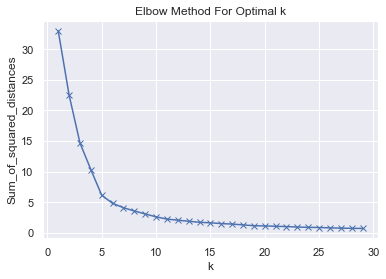

In [147]:
##  plot looks like an arm, then the elbow on the arm is optimal k

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k') 
plt.show()

In the plot above the elbow is at k=5 indicating the optimal k for this dataset is 5

# k_means

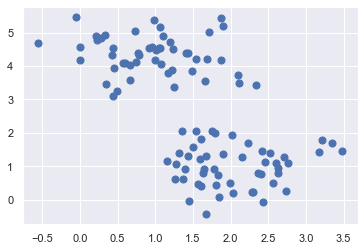

In [148]:
## Import sklearn libraries

## Scatter plot of k_means
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=100, centers=2,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [149]:
## Import kmeans libraries

## Predicting number of k_means clusters 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

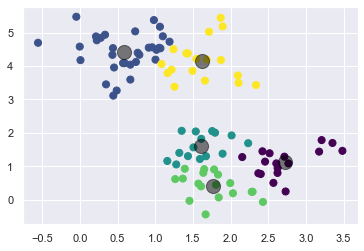

In [150]:

## Scatter plot k_means 

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [151]:
## Import make moons from the sklearn 

from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

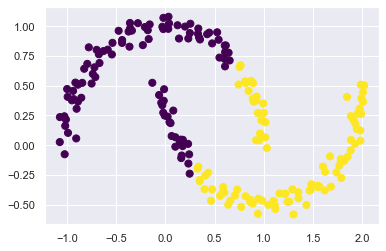

In [152]:
## Scatter plot of k_means

labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

# Principle Component Analysis

In [153]:
## Import PCA libraries
## Import the Necessary Modules

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


In [154]:
## Perform Scaling on the Data

# separate the features from the salesindex
# scale the features

features = ['Revenue', 'Employee','Population', 'Population_University','Percent_University', 'Productivity', 'Infrast', 'Border']

x = Data.loc[:, features].values

y = Data.loc[:,'SalesIndex'].values

x = StandardScaler().fit_transform(x)

In [155]:
### Perform PCA 


## PCA for two Principal Components

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

principalDataframe

,PC1,PC2
0,-0.536878,6.215192
1,1.448042,0.380214
2,2.098183,0.390798
3,0.211012,-0.065470
4,-0.200876,-0.401204
...,...,...
202,-1.030419,-0.279359
203,-0.972339,0.367097
204,3.183890,0.112033
205,-0.685704,-0.414684


In [156]:
## Combine the Sales Index and the Principal Components

SalesIndexDataframe = Data[['SalesIndex']]

newDataframe = pd.concat([principalDataframe, SalesIndexDataframe],axis = 1)

In [157]:
newDataframe

,PC1,PC2,SalesIndex
0,-0.536878,6.215192,111.075774
1,1.448042,0.380214,390.516869
2,2.098183,0.390798,469.856708
3,0.211012,-0.065470,140.750935
4,-0.200876,-0.401204,17.619627
...,...,...,...
202,-1.030419,-0.279359,5.358015
203,-0.972339,0.367097,5.254976
204,3.183890,0.112033,641.725346
205,-0.685704,-0.414684,15.661890


Text(0, 0.5, 'PC2')

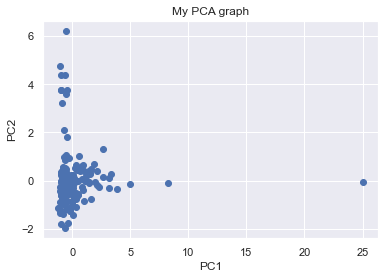

In [158]:

###  Plot the Principal Components on 2D


plt.scatter(principalDataframe.PC1, principalDataframe.PC2)
plt.title('My PCA graph')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [159]:

## the Variance Using Principal Component

pca.explained_variance_ratio_

array([0.54755278, 0.14469988])

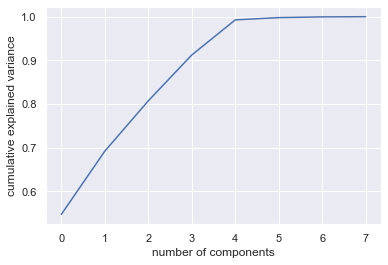

In [160]:

### plot of number of components

pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In the plot above the number of components  is 7 